In [46]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
from matplotlib.cm import rainbow

import warnings
warnings.filterwarnings('ignore')

In [47]:
# loading dataset
df=pd.read_csv('D:/MS DS/TT for DS Theory/data set of cardio disease/heart_statlog_cleveland_hungary_final.csv',index_col=0)
#df=data.copy()
df.head(20)

,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,,,,,,,,,,,
40,1,2,140,289,0,0,172,0,0.0,1,0
49,0,3,160,180,0,0,156,0,1.0,2,1
37,1,2,130,283,0,1,98,0,0.0,1,0
48,0,4,138,214,0,0,108,1,1.5,2,1
54,1,3,150,195,0,0,122,0,0.0,1,0
39,1,3,120,339,0,0,170,0,0.0,1,0
45,0,2,130,237,0,0,170,0,0.0,1,0
54,1,2,110,208,0,0,142,0,0.0,1,0
37,1,4,140,207,0,0,130,1,1.5,2,1


In [48]:
df.target

age
40    0
49    1
37    0
48    1
54    0
     ..
45    1
68    1
57    1
57    1
38    0
Name: target, Length: 1190, dtype: int64

In [49]:
df.shape

(1190, 11)

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest pain type'}>,
        <AxesSubplot:title={'center':'resting bps'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting blood sugar'}>,
        <AxesSubplot:title={'center':'resting ecg'}>],
       [<AxesSubplot:title={'center':'max heart rate'}>,
        <AxesSubplot:title={'center':'exercise angina'}>,
        <AxesSubplot:title={'center':'oldpeak'}>],
       [<AxesSubplot:title={'center':'ST slope'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

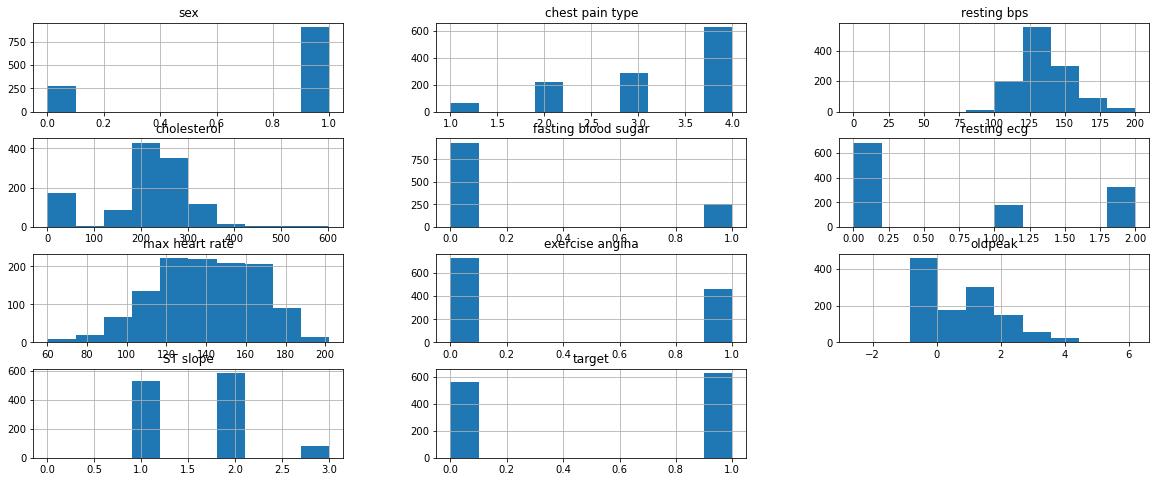

In [71]:
plt.rcParams['figure.figsize'] = (20,8)
df.hist()

In [50]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (952, 10)
Shape of y_train =  (952,)
Shape of X_test =  (238, 10)
Shape of y_test =  (238,)


In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
classifier.score(X_test, y_test)

0.8319327731092437

In [55]:
classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
classifier_entropy.score(X_test, y_test)

0.8445378151260504

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
sc.fit(X_train)

StandardScaler()

In [59]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [60]:
classifier_sc = DecisionTreeClassifier(criterion='gini')
classifier_sc.fit(X_train_sc, y_train)

classifier_sc.score(X_test_sc, y_test)

0.8403361344537815

In [61]:
pred = classifier.predict(X_test)

In [62]:
# importing Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
cm=confusion_matrix(y_test,pred)
cm

array([[ 91,  21],
       [ 19, 107]], dtype=int64)

<AxesSubplot:>

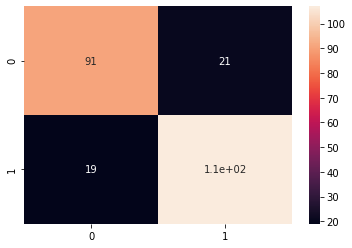

In [64]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       112
           1       0.84      0.85      0.84       126

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238



In [66]:
patient1 = [40,1,2,140,289,0,0,172,0,1]

In [67]:
patient1 = np.array([patient1])
patient1

array([[ 40,   1,   2, 140, 289,   0,   0, 172,   0,   1]])

In [68]:
classifier.predict(patient1)

array([0], dtype=int64)

In [69]:
pred = classifier.predict(patient1)

In [72]:
if pred[0] == 0:
  print('Patient has no Heart Heart Attack in Future')
else:
  print('Patient has Heart Heart Attack in Future')

Patient has no Heart Heart Attack in Future
